# CT Voter registration trends

Per request of colleague I looked at monthly voter registration trends by part, to test whether there really has been a big wave of Democratic excitement.

Here are some of the take-aways (please read them all or not at all):

1. __Independent streak__ - Unaffiliated has started beating both major parties (republican + democrat) combined more consistently since 2016. Over the entire 126 months (excluding July because it's partial), Unaffiliated beat majors 43 times, or 34%. But in the last 24 months, July 2016 to June 2018, there were 19 U-win months, which is 79%.
2. __Democrats have widened lead over Republicans__ - Democrats have always added more voters to their rolls on a monthly basis, but that's expected because their party is twice the size of the Republicans. However, even as a percentage of their party's size (based on June 2018 active voters), Ds have more steadily outpaced Rs than in the past. Unaffiliateds have also more steadily outpaced both, as noted above. 
3. __A higher floor__ - After presidential year spikes, there's usually a slump in registrations, and that was true after 2016 as well. However, the bottom is significantly higher. This could be related to programs that make it easier to for people to register, including motor voter registration at the DMV and online registration. Without the numbres for each program we can't determine this.
4. __But hold on...__ - Item 2, about the Democrats, while they have widened their lead over Republicans, overall registration is up across the board, so it's possible that this overall increase is just naturally making the gaps that have always been there even bigger. In absolute numbers, Democrats have always added more voters to the rolls on a monthly basis than Republicans.
5. __DMV registers 43% of voters__ - Over the lifetime of the program since Aug. 2016, about 43% of voters came through the DMV "motor voter" program.

I also did an additional re-computation of the "post-presidential" periods, inclusive of November, to share them in a spreadsheet. That can be viewed here: https://docs.google.com/spreadsheets/d/e/2PACX-1vS8lozGe_-2t0g1rFLz9ggal_dHNOUUWitRVjqapDCDnR-ENnTPYIa7VJliHJJ3rBm3fNlDrhuJiyRo/pubhtml




## CHANGELOG

Updating this to add more recents numbers from SOTS, provided in a second spreadsheet:

"data/VOTER_REG_BY_MONTH_2018_100218.xlsx"

## FILE HASHES

I just thought of this. To ensure file integrity, I'm going to start hashing them and printing the output in the top of my notebooks.

In [141]:
from hashlib import sha256

def hash_file(fname):
    return sha256(open(fname).read()).hexdigest()
print hash_file("data/VOTER_REG_BY_MONTH_2018_100218.xlsx")
print hash_file("data/REGISTRATION BY YEAR MONTH PARTY.XLSX")

4909f884f037a398c6a6a7ef84d7c508c1a8fb3f1f7104b86d5049725adbbd31
01bb1b5657efa4bebc831dd14901b21808bef88e9b25253330f9244b922bca33


In [142]:
assert(hash_file("data/VOTER_REG_BY_MONTH_2018_100218.xlsx")=="4909f884f037a398c6a6a7ef84d7c508c1a8fb3f1f7104b86d5049725adbbd31")
assert(hash_file("data/REGISTRATION BY YEAR MONTH PARTY.XLSX")=="01bb1b5657efa4bebc831dd14901b21808bef88e9b25253330f9244b922bca33")

### Data import and cleanup stuff: Non-nerds can skip this

In [143]:
import pandas as pd

In [144]:
""" The data came in two spreadsheets. Let's combine them. """

df = pd.concat([pd.read_excel("data/REGISTRATION BY YEAR MONTH PARTY.XLSX", 
                              dtypes={3:int},
                              header=None),
                pd.read_excel("data/VOTER_REG_BY_MONTH_2018_100218.xlsx", 
                              dtypes={3:int},
                              header=None)])
                #pd.read_excel("data/2018 registrations.xlsx", header=None)])
df.columns = ["year","month","party","registrations"]
print df.dtypes
df.head()

year              int64
month             int64
party            object
registrations     int64
dtype: object


,year,month,party,registrations
0,2017,1,Democratic,2473
1,2017,1,Green Party,11
2,2017,1,Independent,212
3,2017,1,Libertarian,14
4,2017,1,Republican,1398


In [145]:
### For some reason we had some registrations showing up as fractions
### Looks like we're good now
df[df["registrations"].astype(str).str.endswith(".5")]

,year,month,party,registrations


In [146]:
import numpy as np
## Let's make sure there's no duplicate month, year, party combinations
df.groupby(["year","month","party"]).agg({"registrations":"count"}).sort_values(by="registrations", ascending=False).head()

registrations
year month party                          
2008 1     Chatham Party                 1
2015 4     Working Families              1
     3     Democratic                    1
           Green Party                   1
           Independent                   1

## There are too many parties to keep track of

In [147]:
""" Don't need all these """

df["party"].unique()

array([u'Democratic', u'Green Party', u'Independent', u'Libertarian',
       u'Republican', u'Unaffiliated', u'Working Families',
       u'Bottom Line', u'U-It', u'A Sentinel Party', u'Reform',
       u'Unaffiliated (Conservative)', u'We The People', u'Independence',
       u'Friends Of Saybrook', u'A Brookfield Party',
       u'Milford Independent Party', u'Colchester Independent Party',
       u'U/i', u'Chatham Party', u'Independent Choice',
       u'Canterbury First', u'Realistic Balance', u'Spring Glen Party',
       u'Winsted Independent', u'A Better Future', u'Open'], dtype=object)

In [148]:
#df["registrations"]

In [149]:
""" Parties of interest  """

parties = ["Democratic","Republican","Unaffiliated"]

In [150]:
# df.head(20)

In [151]:
def group_others(df):
    
    """ Group all non-major parties together """
    ret = df.copy()
    
    
    ret = ret[ret["party"].apply(lambda x: x not in parties)]
    
    the_rest = ret.copy()

    ret = ret.groupby(["year","month"]).agg({"registrations":sum}).reset_index()
    ret["party"] = "Other"
    
    return pd.concat([ret, df.copy()])[["year","month","party","registrations"]]

df = group_others(df)

/Users/jakekara/pandas/lib/python2.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [152]:
others = group_others(df)
others[(others["party"] == "Other")&(others["registrations"].astype(str).str.endswith(".5"))]

/Users/jakekara/pandas/lib/python2.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,year,month,party,registrations


In [153]:
# df.head()

In [154]:
# df["year"].unique()

In [155]:
""" Add the Other category """
parties += ["Other"]
parties

['Democratic', 'Republican', 'Unaffiliated', 'Other']

In [156]:
# df.head()

In [157]:
# "Republican" in df["party"].unique()

In [158]:
df["registrations"] = df["registrations"].astype(int)

### Charts start here

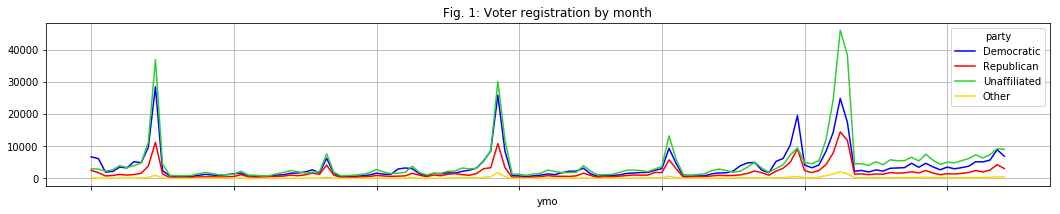

In [159]:
%matplotlib inline 
#timedf = pd.pivot_table(df, index="party",columns=["year","month"],values="registrations").reset_index()
# .transpose()
timedf = pd.pivot_table(df, index="party",columns=["year","month"],values="registrations")
#timedf

chartdf = timedf[timedf.index.map(lambda x: x in parties)]\
.transpose().reset_index()


chartdf["ymo"] = chartdf["year"].astype(str) + "-" + chartdf["month"].apply(lambda x: str(x).zfill(2)).astype(str)

""" UPDATE: Drop partial data from October 2018 ####(PREVIOUSLY: July 2018) """

#chartdf = chartdf[chartdf["ymo"] != "2018-07"]
chartdf = chartdf[chartdf["ymo"] != "2018-10"]

chartdf = chartdf.set_index("ymo")

chartdf = chartdf[parties]#[["Republican","Democratic","Unaffiliated"]]

# Not sure why this is happening other than floating point errors
# for p in parties:
#     chartdf[p] = chartdf[p].astype(int)

colors = ["blue","red","limegreen","gold"]
chartdf\
.plot(
    figsize=(18,3),
    grid=True,
    colors=colors,
    title="Fig. 1: Voter registration by month"
    #ylim=(0,10000)
)


In [160]:
chartdf.head()

party,Democratic,Republican,Unaffiliated,Other
ymo,,,,
2008-01,6711.0,2499.0,3023.0,160.0
2008-02,6162.0,1797.0,2907.0,118.0
2008-03,1966.0,765.0,2258.0,60.0
2008-04,2175.0,911.0,2645.0,90.0
2008-05,3510.0,1250.0,3969.0,74.0


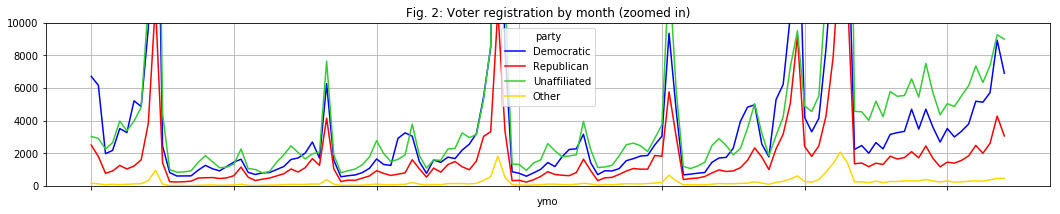

In [161]:
""" Let's zoom in """
chartdf\
.plot(
    figsize=(18,3),
    grid=True,
    colors=colors,
    ylim=(0,10000),
    title="Fig. 2: Voter registration by month (zoomed in)"
)


In [77]:
chartdf.tail()

party,Democratic,Republican,Unaffiliated
ymo,,,
2018-05,5183.0,2478.0,7345.0
2018-06,5128.0,1995.0,6335.0
2018-07,5713.0,2608.0,7375.0
2018-08,8929.0,4275.0,9258.0
2018-09,6902.0,3057.0,8995.0


In [162]:
chartdf[chartdf["Other"].astype(str).str.endswith(".5")]

party,Democratic,Republican,Unaffiliated,Other
ymo,,,,


In [163]:
""" Let's see how these figures look as a percentage of the most recent party size figures.
See other notebook for these figures. 
""" 
# 2010 	419353 	751360 	843399
# 2014 	407519 	712925 	818381
# 2018 YTD 	446265 	760672 	857111

size = {
    
    # Using 2014 proportions doesn't change the % much
    "Republican":"407519",
    "Democratic":"712925",
    "Unaffiliated":818381,
#     # 2018 numbers
#     "Republican":"446265",
#     "Democratic":"760672",
#     "Unaffiliated":"857111"
}

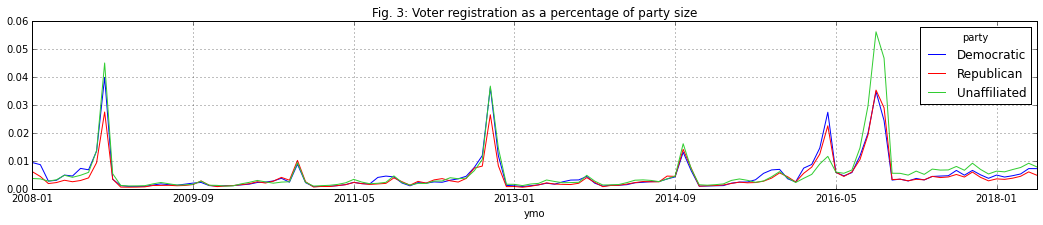

In [654]:
pctdf = chartdf.copy()[parties[:-1]]
for c in pctdf.columns:
    pctdf[c] = pctdf[c] / int(size[c])
pctdf.plot(
    grid=True,
    colors=colors, 
    figsize=(18,3),
    title="Fig. 3: Voter registration as a percentage of party size"
)

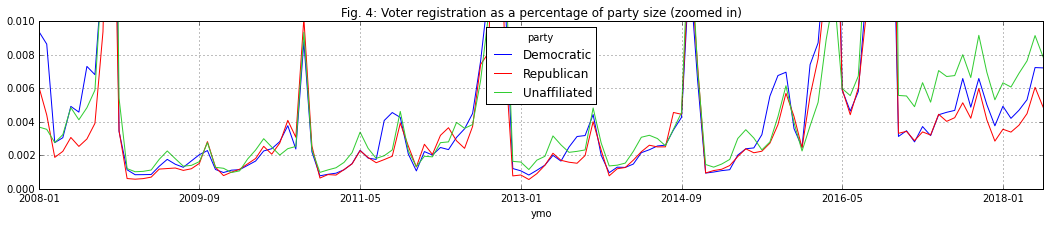

In [655]:
""" Let's zoom in """
pctdf.plot(
    grid=True,
    colors=colors,
    ylim=(0,.01),
    figsize=(18,3),
    title="Fig. 4: Voter registration as a percentage of party size (zoomed in)"
)

In [735]:
""" Print a spreadsheet for web chart tool """
print (chartdf[["Republican","Democratic","Unaffiliated"]].to_csv(
    sep="\t",
    float_format="%.0f"
))

ymo	Republican	Democratic	Unaffiliated
2008-01	2499	6711	3023
2008-02	1797	6162	2907
2008-03	765	1966	2258
2008-04	911	2175	2645
2008-05	1250	3510	3969
2008-06	1032	3265	3374
2008-07	1213	5212	3965
2008-08	1594	4860	4824
2008-09	3824	9661	11206
2008-10	11216	28472	36907
2008-11	1413	2441	4424
2008-12	250	810	987
2009-01	234	600	834
2009-02	248	603	853
2009-03	284	609	919
2009-04	480	960	1441
2009-05	493	1254	1850
2009-06	506	1045	1471
2009-07	448	916	1106
2009-08	488	1186	1145
2009-09	619	1454	1328
2009-10	1149	1628	2256
2009-11	526	823	1051
2009-12	321	692	1003
2010-01	406	794	796
2010-02	476	814	876
2010-03	607	997	1456
2010-04	739	1183	1898
2010-05	1034	1612	2450
2010-06	843	1707	2041
2010-07	1113	2008	1649
2010-08	1666	2687	1962
2010-09	1255	1695	2070
2010-10	4149	6263	7647
2010-11	1042	1576	1912
2010-12	262	553	802
2011-01	346	618	924
2011-02	334	665	1029
2011-03	468	810	1291
2011-04	607	1072	1767
2011-05	928	1643	2770
2011-06	761	1307	1977
2011-07	635	1251	1488
2011-08	711	2908	1

In [657]:
""" Generate spreadsheet for Ana """
chartdf[parties[:-1]].to_excel("combined.xlsx")

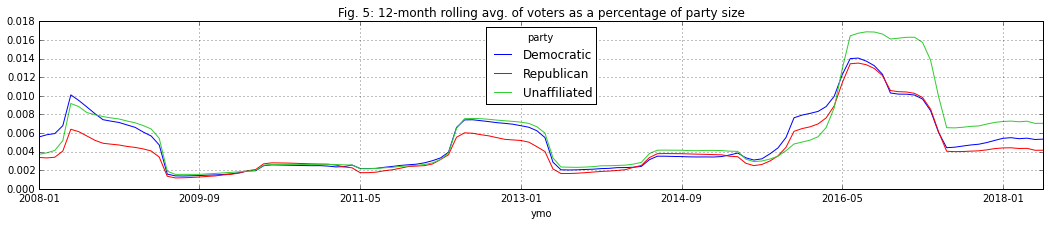

In [658]:
pctdf[parties[:-1]].rolling(12,center=True, min_periods=1)\
.mean().plot(figsize=(18,3), grid=True,
             colors=colors,
             title="Fig. 5: 12-month rolling avg. of voters as a percentage of party size")

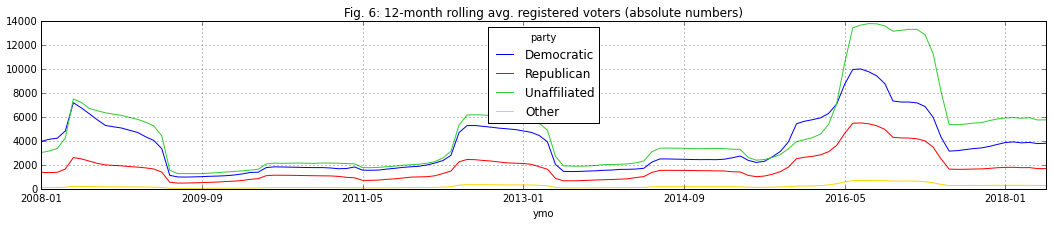

In [659]:
chartdf.rolling(12,center=True, min_periods=1)\
.mean().plot(figsize=(18,3), grid=True,
             colors=colors,
             title="Fig. 6: 12-month rolling avg. registered voters (absolute numbers)")

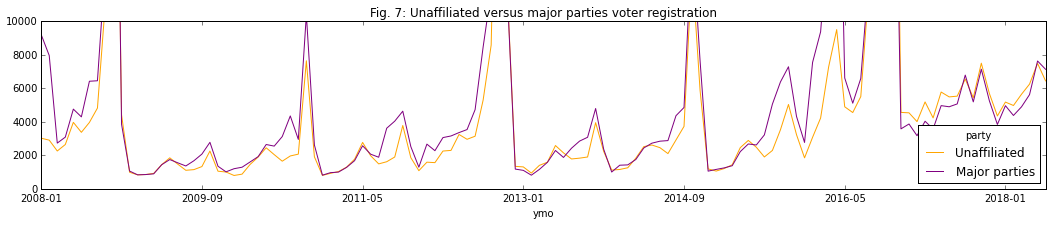

In [660]:
combined_df = chartdf.copy()
combined_df["Major parties"] = combined_df["Republican"] + combined_df["Democratic"]
combined_df[["Unaffiliated","Major parties"]].plot(ylim=(0,10000), figsize=(18,3), 
                                                   title="Fig. 7: Unaffiliated versus major parties voter registration",
                                                   colors=["orange","purple"])

In [661]:
combined_df.reset_index()[combined_df.reset_index()["ymo"] == "2016-11"]

party,ymo,Democratic,Republican,Unaffiliated,Other,Major parties
106,2016-11,17432.0,11824.0,38331.0,1413.0,29256.0


In [662]:
combined_df.reset_index()[combined_df.reset_index()["ymo"] == "2017-11"]

party,ymo,Democratic,Republican,Unaffiliated,Other,Major parties
118,2017-11,3584.0,1678.0,5697.0,300.0,5262.0


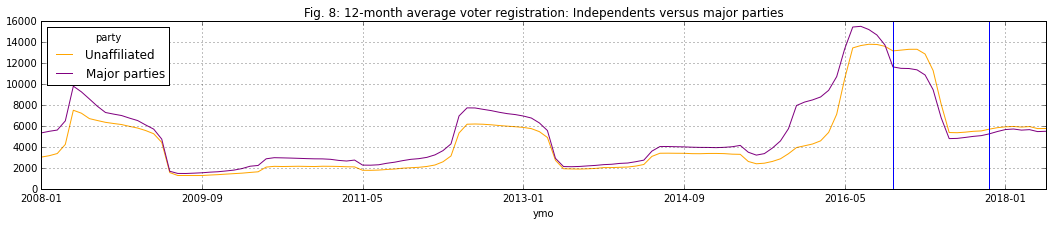

In [663]:
import matplotlib.pyplot as plt
ax = combined_df[["Unaffiliated","Major parties"]]\
.rolling(12,center=True, min_periods=1).mean().plot(
    figsize=(18,3), 
    grid=True, 
    colors=["orange","purple"],
    title="Fig. 8: 12-month average voter registration: Independents versus major parties"
)
ax.axvline(x=106, ymin=0, ymax=1600)
ax.axvline(x=106 + 12, ymin=0, ymax=1600)

### How often to unaffiliated voters win?

How many months do more unaffiliated voters register than democrats and Republicans combined (u-win months)?

Out of 126 months, 43 months have been u-wins (34%).

Out of the past 18 months, 15 have been u-wins (83%).

For the last 24omonths, U-wins were (79.2%).

Calculations are below.

In [664]:
diff_df["drdiff"] = diff_df["Democratic"] - diff_df["Republican"]

In [665]:
diff_df = combined_df.copy()
diff_df["diff"] = combined_df["Unaffiliated"] - combined_df["Major parties"]
print ( len(diff_df ))
print (len (diff_df[diff_df["diff"] > 0]))
print (len (diff_df[(diff_df["diff"] > 0)]))

print (len (diff_df[diff_df["diff"] < 0]))

126
43
43
82


In [666]:
print "u-wins % over entire data set"
43. / 126.

u-wins % over entire data set


0.3412698412698413

In [667]:
unaff_wins = diff_df[(diff_df["diff"] > 0.0)]

print "u-wins since 2017 on"
len(unaff_wins[unaff_wins.index.map(lambda x: x > "2017-00")])

u-wins since 2017 on


15

In [668]:
15. / 18.

0.8333333333333334

In [669]:
print "u-wins since Sept 2016 on"
len(unaff_wins[unaff_wins.index.map(lambda x: x > "2016-08")])

u-wins since Sept 2016 on


19

In [670]:
print "u-wins in past 24 months"
len(unaff_wins[unaff_wins.index.map(lambda x: x > "2016-06")])

u-wins in past 24 months


19

In [671]:
19. / 24.

0.7916666666666666

# Post-presidential periods

In order to compare the currrent election cycle, we're going to look at total voters added from Nov. 2016 to June 2018, and then the same periods in 2012-2014 and 2008-2010, to see each party's share of new voters

In [672]:
from datetime import datetime
def ymodt(ymo):
    ret = datetime.strptime(ymo,"%Y-%m")
    return ret
    
ymodt("2012-02")

datetime.datetime(2012, 2, 1, 0, 0)

In [715]:
def post_pres(pyear, with_nov=False):
    start = str(pyear) + "-" + "11"
    end = str(int(pyear) + 2) + "-" + "06"
    
    if with_nov:
        ret = chartdf[(chartdf.index.map(ymodt) >= start) & (chartdf.index.map(ymodt) <= end)]
    else:
        ret = chartdf[(chartdf.index.map(ymodt) > start) & (chartdf.index.map(ymodt) <= end)]
    
    return ret

post_pres(2016, with_nov=True)

party,Democratic,Republican,Unaffiliated,Other
ymo,,,,
2016-11,17432.0,11824.0,38331.0,1413.0
2016-12,2229.0,1351.0,4564.0,243.0
2017-01,2473.0,1398.0,4538.0,239.0
2017-02,1999.0,1173.0,4014.0,193.0
2017-03,2651.0,1385.0,5189.0,287.0
2017-04,2265.0,1309.0,4235.0,193.0
2017-05,3154.0,1814.0,5780.0,263.0
2017-06,3258.0,1642.0,5490.0,261.0
2017-07,3339.0,1731.0,5535.0,304.0


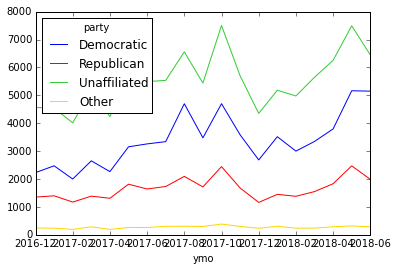

In [702]:
post_pres(2016).plot(colors=colors)

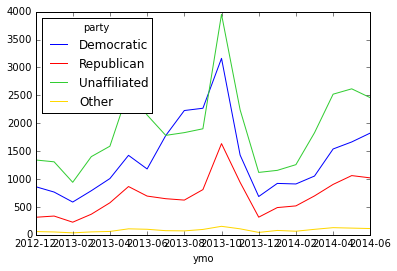

In [703]:
post_pres(2012).plot(colors=colors)

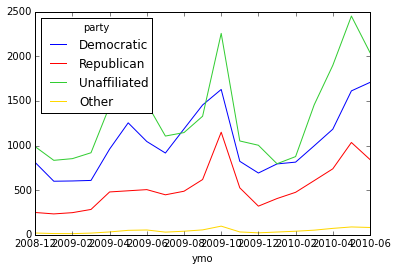

In [704]:
post_pres(2008).plot(colors=colors)

In [721]:
def post_pres_summary(year, with_nov=False):
    ret = post_pres(year, with_nov=with_nov).sum().to_frame()
    ret.columns = ["sum"]
    ret = ret.transpose()
    
    total = 0
    for c in parties:
        total = total + int(ret[c])
    ret["total"] = total
    
    ret = ret.transpose()

    ret["pct"] = ret["sum"] / total
    
    ret["pres. year"] = year
    
    return ret

post_pres_summary(2016)

,sum,pct,pres. year
party,,,
Democratic,64476.0,0.312817,2016
Republican,31566.0,0.153148,2016
Unaffiliated,104887.0,0.508879,2016
Other,5185.0,0.025156,2016
total,206114.0,1.000000,2016


In [722]:
post_pres_summary(2012)

,sum,pct,pres. year
party,,,
Democratic,26079.0,0.340084,2012
Republican,13034.0,0.169970,2012
Unaffiliated,35967.0,0.469029,2012
Other,1604.0,0.020917,2012
total,76684.0,1.000000,2012


In [723]:
post_pres_summary(2008)

,sum,pct,pres. year
party,,,
Democratic,19687.0,0.348801,2008
Republican,10151.0,0.179848,2008
Unaffiliated,25761.0,0.456415,2008
Other,843.0,0.014936,2008
total,56442.0,1.000000,2008


In [727]:
""" Combine these summaries for a chart"""
def post_pres_combined(with_nov=False):
    frames = []
    for y in [2008, 2012, 2016]:
        frames.append(post_pres_summary(y,with_nov=with_nov))
    return pd.concat(frames).reset_index().set_index(["pres. year","party"])

post_pres_combined()

sum       pct
pres. year party                           
2008       Democratic     19687.0  0.348801
           Republican     10151.0  0.179848
           Unaffiliated   25761.0  0.456415
           Other            843.0  0.014936
           total          56442.0  1.000000
2012       Democratic     26079.0  0.340084
           Republican     13034.0  0.169970
           Unaffiliated   35967.0  0.469029
           Other           1604.0  0.020917
           total          76684.0  1.000000
2016       Democratic     64476.0  0.312817
           Republican     31566.0  0.153148
           Unaffiliated  104887.0  0.508879
           Other           5185.0  0.025156
           total         206114.0  1.000000

In [729]:
post_pres_combined(with_nov=True)

sum       pct
pres. year party                           
2008       Democratic     22128.0  0.341402
           Republican     11564.0  0.178415
           Unaffiliated   30185.0  0.465710
           Other            938.0  0.014472
           total          64815.0  1.000000
2012       Democratic     34517.0  0.342013
           Republican     16392.0  0.162421
           Unaffiliated   47884.0  0.474461
           Other           2130.0  0.021105
           total         100923.0  1.000000
2016       Democratic     81908.0  0.297724
           Republican     43390.0  0.157716
           Unaffiliated  143218.0  0.520577
           Other           6598.0  0.023983
           total         275114.0  1.000000

In [725]:
64476/26079.0

2.4723340618888763

In [710]:
31566.0/10151.0

3.1096443700128065

### Approx. 43% of voter registrations came through DMV

According to SOTS via email, it's 189,838 to date from August 2016 to when I asked July 18, and it didn't start at the beginning of AUgust, it was AUg. 8, so we will just approximate by using Aug. 2016 - June 2018. Here's the math

In [745]:
dmvdf = chartdf.copy()
dmvdf = dmvdf[dmvdf.index >= "2016-08"]
dmvdf.head()

party,Democratic,Republican,Unaffiliated,Other
ymo,,,,
2016-08,8400.0,4268.0,11975.0,847.0
2016-09,14214.0,7869.0,24321.0,1364.0
2016-10,24829.0,14422.0,46047.0,2069.0
2016-11,17432.0,11824.0,38331.0,1413.0
2016-12,2229.0,1351.0,4564.0,243.0


In [746]:
dmvdf["total"] = dmvdf["Democratic"] + dmvdf["Republican"] + dmvdf["Unaffiliated"] + dmvdf["Other"] 

In [747]:
dmvdf.sum()

party
Democratic      129351.0
Republican       69949.0
Unaffiliated    225561.0
Other            10878.0
total           435739.0
dtype: float64

In [748]:
print "% from DMV: " + str(189838 / dmvdf.sum()["total"] )

% from DMV: 0.435669058771
